# Links between air pollution and COVID-19 in England #

## AIM 1: PRELIMINARY ANALYSIS AND REGIONAL LEVEL ANALYSIS ##

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #to standardize
import statsmodels.api as sm #to fit models



In [55]:
path = "https://raw.githubusercontent.com/M1gus/AirPollutionCOVID19/gh-pages/data"

In [73]:
preL_dt = pd.read_csv("%s/26-4-2020_yyAIR_COVID_PRE_LD_dt.csv" %path)
preL_dt=preL_dt.loc[:,"Region":]#delete the first column
preL_dt

,Region,cases_preL,deaths_preL,Date_cases,Population_size_2018,Average_Pop_density_personkm2,Cases,Deaths,NO.levels,NO2.levels,O3.levels
0,East Of England,5356,746,NaN,6201214,324.0,6499,1448,9.502135,19.553718,54.367479
1,London,16913,2120,NaN,8908081,5666.0,19511,3522,25.193133,38.512520,36.913913
2,Midlands,10501,1491,NaN,10704906,380.5,14844,2684,14.529437,24.119851,47.698892
3,North East And Yorkshire,8004,893,NaN,8137524,333.0,10633,1641,16.501209,25.151394,45.295342
4,North West,9394,847,NaN,7292093,517.0,12093,1801,8.581661,20.062745,48.950810
5,South East,8547,783,NaN,9133625,479.0,10919,1430,10.646127,20.470127,52.303816
6,South West,2898,368,NaN,5599735,235.0,3913,608,14.047061,21.991481,48.053691


In [74]:
#keep only numerical columns to normalize them
preL_dt_1=preL_dt.drop(columns=['Region',"Date_cases"])

#standardize
zs = StandardScaler()
preL_dt_st = zs.fit_transform(preL_dt_1)
preL_dt_st #it is standardized but it is an array, not a dataframe

cols=list(preL_dt_1.columns)#take columns' names
preL_dt_st=pd.DataFrame(preL_dt_st, columns=cols)
preL_dt_st

preL_dt_st['Region']=preL_dt['Region'] #add region col again
preL_dt_st

,cases_preL,deaths_preL,Population_size_2018,Average_Pop_density_personkm2,Cases,Deaths,NO.levels,NO2.levels,O3.levels,Region
0,-0.844810,-0.537114,-1.091478,-0.436976,-0.987511,-0.487041,-0.884927,-0.768450,1.290319,East Of England
1,1.988584,2.012719,0.553993,2.446688,1.744846,1.871485,2.107078,2.323251,-2.064650,London
2,0.416574,0.845437,1.646261,-0.406477,0.764834,0.918522,0.073693,-0.023829,0.008466,Midlands
3,-0.195608,-0.264315,0.085581,-0.432118,-0.119423,-0.267564,0.449677,0.144389,-0.453550,North East And Yorkshire
4,0.145174,-0.349681,-0.428346,-0.332793,0.187159,-0.085614,-1.060446,-0.685441,0.249113,North West
5,-0.062483,-0.468450,0.691099,-0.353306,-0.059366,-0.507510,-0.666787,-0.619007,0.893636,South East
6,-1.447430,-1.238596,-1.457110,-0.485019,-1.530539,-1.442278,-0.018287,-0.370913,0.076666,South West


### Visualise the distribution of each variable

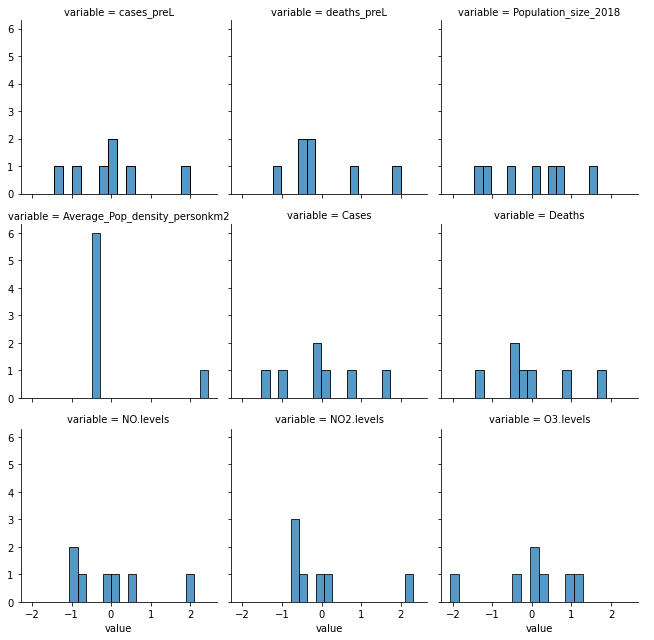

In [75]:
preL_dt_new=pd.melt(preL_dt_st, id_vars='Region')
preL_dt_new
g = sns.FacetGrid(preL_dt_new, col='variable', col_wrap=3)
g.map(sns.histplot, 'value', bins=15)
g.add_legend()

### Fit a linear model to explore the relationship between deaths and air pollutions at regional level,                controlling for population density

In [59]:
x=sm.add_constant(preL_dt.loc[:,['Average_Pop_density_personkm2','NO.levels','NO2.levels','O3.levels']]) #regressors matrix
y=preL_dt.loc[:,['deaths_preL']] #dependent variable

model = sm.OLS(y, x).fit() #ols
model.summary()

#ols is not good model for the data (overdispersed)

C:\Users\biagi\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            deaths_preL   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     10.87
Date:                Mon, 13 Sep 2021   Prob (F-statistic):             0.0860
Time:                        12:02:10   Log-Likelihood:                -43.023
No. Observations:                   7   AIC:                             96.05
Df Residuals:                       2   BIC:                             95.78
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.235e+04   4843.598     -2.549      0.126   -3.32e+04    8494.212
Average_Pop_density_personkm2    -0.6310      0.254     -2.480      0.131      -1.726       0.464
NO.levels                      -332.5735    112.432     -2.958      0.098    -816.328     151.181
NO2.levels                      601.4702    178.233      3.375      0.078    -165.402    1368.343
O3.levels                        88.2410     54.093      1.631      0.244    -144.503     320.985
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.539
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.100
Skew:                          -0.009   Prob(JB):                        0.951
Kurtosis:                       2.416   Cond. No.                     1.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# tranform in thousands
preL_dt['NO.levels'] = round(preL_dt['NO.levels']*1000)
preL_dt['NO2.levels'] = round(preL_dt['NO2.levels']*1000)
preL_dt['O3.levels'] = round(preL_dt['O3.levels']*1000)
preL_dt['Average_Pop_density_personkm2'] = round(preL_dt['Average_Pop_density_personkm2'])

#convert into integer
preL_dt_int = preL_dt.copy()
preL_dt_int['NO.levels']=preL_dt['NO.levels'].astype(int)
preL_dt_int['NO2.levels'] = preL_dt['NO2.levels'].astype(int)
preL_dt_int['O3.levels'] = preL_dt['O3.levels'].astype(int)
preL_dt_int['Average_Pop_density_personkm2']  = preL_dt['Average_Pop_density_personkm2'].astype(int)
preL_dt_int.rename(columns={'NO.levels':'NO_levels', 'NO2.levels':'NO2_levels', 'O3.levels':'O3_levels'}, inplace=True)
#must change col names becuase the . is not ok for the binomial fit
preL_dt_int.info()

,Region,cases_preL,deaths_preL,Date_cases,Population_size_2018,Average_Pop_density_personkm2,Cases,Deaths,NO.levels,NO2.levels,O3.levels
0,East Of England,5356,746,NaN,6201214,324.0,6499,1448,9502.0,19554.0,54367.0
1,London,16913,2120,NaN,8908081,5666.0,19511,3522,25193.0,38513.0,36914.0
2,Midlands,10501,1491,NaN,10704906,380.0,14844,2684,14529.0,24120.0,47699.0
3,North East And Yorkshire,8004,893,NaN,8137524,333.0,10633,1641,16501.0,25151.0,45295.0
4,North West,9394,847,NaN,7292093,517.0,12093,1801,8582.0,20063.0,48951.0
5,South East,8547,783,NaN,9133625,479.0,10919,1430,10646.0,20470.0,52304.0
6,South West,2898,368,NaN,5599735,235.0,3913,608,14047.0,21991.0,48054.0


### Fit a Negative Binomial regression model to explore the relationship between deaths and air pollutions at regional level,  controlling for population density

In [69]:
#negative binomial fit
import statsmodels.formula.api as smf 
import statsmodels.api as sm
mod_nbin = smf.glm(formula = "deaths_preL~ Average_Pop_density_personkm2 + NO_levels + NO2_levels + O3_levels", data=preL_dt_int, family=sm.families.NegativeBinomial()).fit()
mod_nbin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            deaths_preL   No. Observations:                    7
Model:                            GLM   Df Residuals:                        2
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54.715
Date:                Mon, 13 Sep 2021   Deviance:                     0.043331
Time:                        12:06:46   Pearson chi2:                   0.0433
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -10.8043     22.924     -0.471      0.637     -55.735      34.126
Average_Pop_density_personkm2    -0.0009      0.001     -0.769      0.442      -0.003       0.001
NO_levels                        -0.0005      0.001     -0.883      0.377      -0.002       0.001
NO2_levels                        0.0008      0.001      0.959      0.338      -0.001       0.002
O3_levels                         0.0001      0.000      0.466      0.641      -0.000       0.001
=================================================================================================
"""

### Fit a Poisson regression model to explore the relationship between deaths and air pollutions at regional level,  controlling for population density

In [80]:
#poisson fit
mod_nbin = smf.glm(formula = "deaths_preL~ Average_Pop_density_personkm2 + NO_levels + NO2_levels + O3_levels", data=preL_dt_int, family=sm.families.Poisson()).fit()
mod_nbin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            deaths_preL   No. Observations:                    7
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -49.547
Date:                Mon, 13 Sep 2021   Deviance:                       38.539
Time:                        12:31:38   Pearson chi2:                     38.5
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -11.5904      0.909    -12.749      0.000     -13.372      -9.809
Average_Pop_density_personkm2    -0.0010   4.57e-05    -21.381      0.000      -0.001      -0.001
NO_levels                        -0.0005    2.3e-05    -21.360      0.000      -0.001      -0.000
NO2_levels                        0.0008   3.57e-05     23.681      0.000       0.001       0.001
O3_levels                         0.0001   9.46e-06     13.180      0.000       0.000       0.000
=================================================================================================
"""

### analyse case data: linear, negative binomial and poisson regression model to explore the relationship

In [98]:


#linear model fit
x=sm.add_constant(preL_dt.loc[:,['Average_Pop_density_personkm2','NO.levels','NO2.levels','O3.levels']])
y=preL_dt.loc[:,['cases_preL']]
model = sm.OLS(y, x).fit()
print(model.summary())

#negative binomial fit
mod_nbin = smf.glm(formula = "cases_preL~ Average_Pop_density_personkm2 + NO_levels + NO2_levels + O3_levels", data=preL_dt_int, family=sm.families.NegativeBinomial()).fit()
print(mod_nbin.summary())

#poisson fit
mod_poi = smf.glm(formula = "cases_preL~ Average_Pop_density_personkm2 + NO_levels + NO2_levels + O3_levels", data=preL_dt_int, family=sm.families.Poisson()).fit()
print(mod_poi.summary())

                            OLS Regression Results                            
Dep. Variable:             cases_preL   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     7.373
Date:                Mon, 13 Sep 2021   Prob (F-statistic):              0.123
Time:                        12:42:08   Log-Likelihood:                -58.480
No. Observations:                   7   AIC:                             127.0
Df Residuals:                       2   BIC:                             126.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

C:\Users\biagi\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [121]:
### produce an html file for supplementary table 2
#! pip install stargazer
from stargazer.stargazer import Stargazer
star = Stargazer([mod_nbin, mod_poi])#, mod_nbin, mod_poi])
#star.custom_columns=(['modelll'])
star.show_confidence_intervals(True)
star.custom_columns(['negative binomial', 'poisson'], [1, 1])
star
#star.render_html()

TypeError: custom_columns() got an unexpected keyword argument 'yerr'